**Task 1 : Perform Data Cleaning**





In [1]:
import pandas as pd
import numpy as np
from scipy import stats

# Load the datasets
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

# Add a column to indicate whether a row is from the training set or test set
train_data['is_train'] = 1
test_data['is_train'] = 0

# Combine the training and test datasets for cleaning
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Check for missing values in the combined dataset
print("Missing values before cleaning:")
print(combined_data.isnull().sum())
print("\n")

# Fill missing 'Age' values with the mean age
combined_data["Age"] = combined_data["Age"].fillna(combined_data["Age"].mean())

# Fill missing 'Fare' values with the mean fare
combined_data["Fare"] = combined_data["Fare"].fillna(combined_data["Fare"].mean())

# Fill missing 'Embarked' values with the most common embarkation port
combined_data["Embarked"] = combined_data["Embarked"].fillna(combined_data["Embarked"].mode()[0])

# Temporarily fill missing 'Survived' values in the test data with -1
combined_data["Survived"] = combined_data["Survived"].fillna(-1)

# Handle outliers by removing rows with z-scores greater than 3
numerical_features = combined_data.select_dtypes(include=[np.number])
z_scores = stats.zscore(numerical_features)
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
combined_data = combined_data[filtered_entries]

# Drop columns that aren't needed for this analysis
combined_data.drop(["PassengerId", "Ticket", "Cabin"], axis=1, inplace=True)

# Check for missing values again to ensure they're all handled
print("Missing values after cleaning:")
print(combined_data.isnull().sum())
print("\n")

# Print the shape of the cleaned dataset
print("Shape of cleaned data:", combined_data.shape)
print("\n")

# Separate the cleaned data back into training and test sets
train_cleaned = combined_data[combined_data['is_train'] == 1].drop(columns=['is_train'])
test_cleaned = combined_data[combined_data['is_train'] == 0].drop(columns=['is_train'])

# Print out the first few rows of the cleaned training data to verify
print("Cleaned Training Data:")
print(train_cleaned.head().to_string(index=False))
print("\n")

# Print out the first few rows of the cleaned test data to verify
print("Cleaned Test Data:")
print(test_cleaned.head().to_string(index=False))
print("\n")

# Save the cleaned datasets to new CSV files
train_cleaned.to_csv("/kaggle/working/train_cleaned.csv", index=False)
test_cleaned.to_csv("/kaggle/working/test_cleaned.csv", index=False)


Missing values before cleaning:
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
is_train          0
dtype: int64


Missing values after cleaning:
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
is_train    0
dtype: int64


Shape of cleaned data: (1206, 10)


Cleaned Training Data:
 Survived  Pclass                                                Name    Sex  Age  SibSp  Parch    Fare Embarked
      0.0       3                             Braund, Mr. Owen Harris   male 22.0      1      0  7.2500        S
      1.0       1 Cumings, Mrs. John Bradley (Florence Briggs Thayer) female 38.0      1      0 71.2833        C
      1.0       3                              Heikkinen, Miss. Laina female 26.0      0      0  7.9250      

**Task 2 : Calculate summary statistics**

In [2]:
import pandas as pd
import numpy as np

# Load the combined dataset
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Display the summary statistics
summary_stats = combined_data.describe(include='all')

print("Summary Statistics:")
print(summary_stats)


Summary Statistics:
        PassengerId    Survived       Pclass                  Name   Sex  \
count   1309.000000  891.000000  1309.000000                  1309  1309   
unique          NaN         NaN          NaN                  1307     2   
top             NaN         NaN          NaN  Connolly, Miss. Kate  male   
freq            NaN         NaN          NaN                     2   843   
mean     655.000000    0.383838     2.294882                   NaN   NaN   
std      378.020061    0.486592     0.837836                   NaN   NaN   
min        1.000000    0.000000     1.000000                   NaN   NaN   
25%      328.000000    0.000000     2.000000                   NaN   NaN   
50%      655.000000    0.000000     3.000000                   NaN   NaN   
75%      982.000000    1.000000     3.000000                   NaN   NaN   
max     1309.000000    1.000000     3.000000                   NaN   NaN   

                Age        SibSp        Parch    Ticket         Far

**Task 3 : Visualization using Histogram**

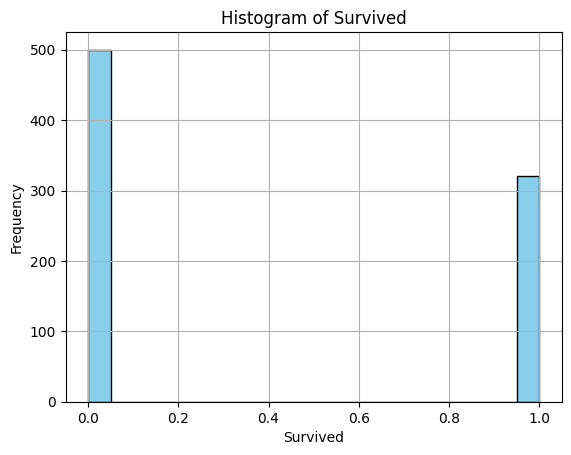

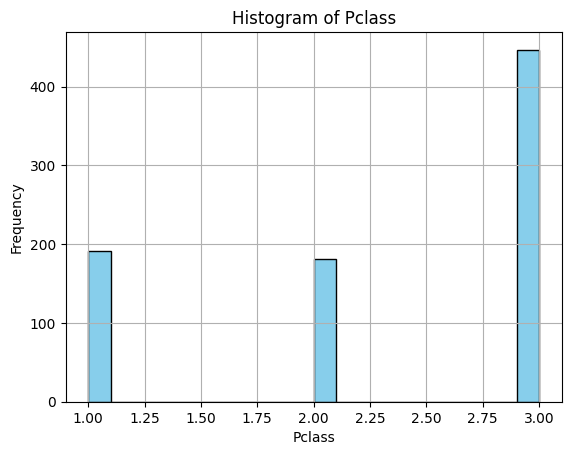

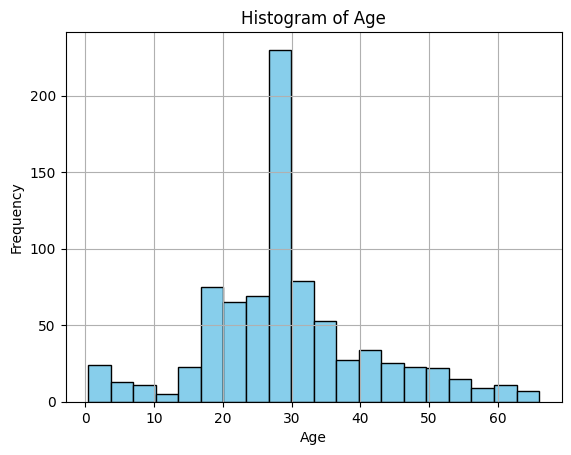

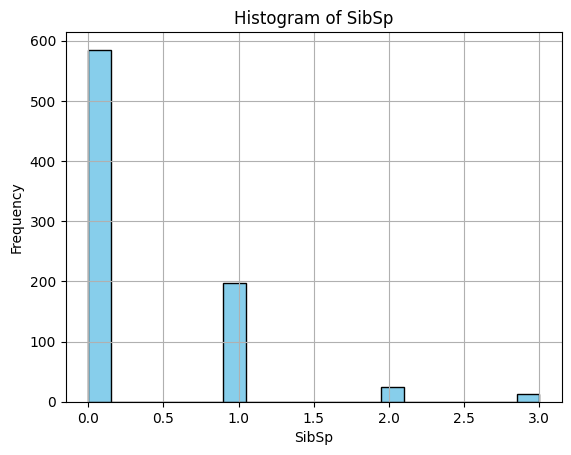

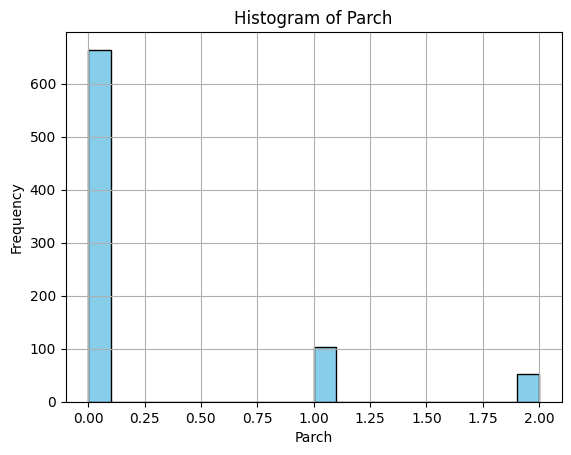

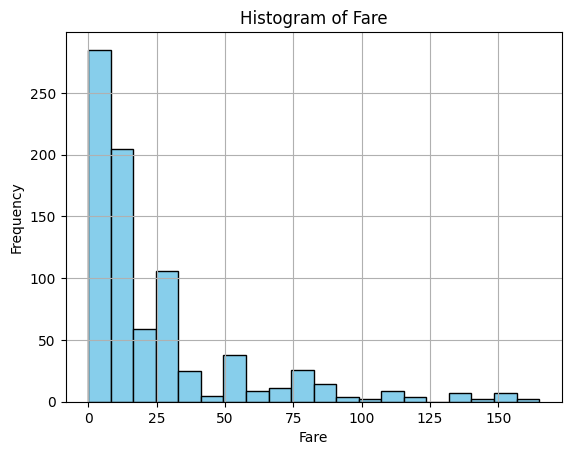

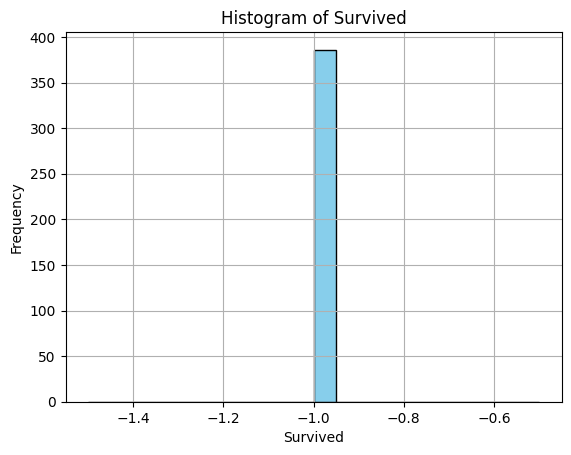

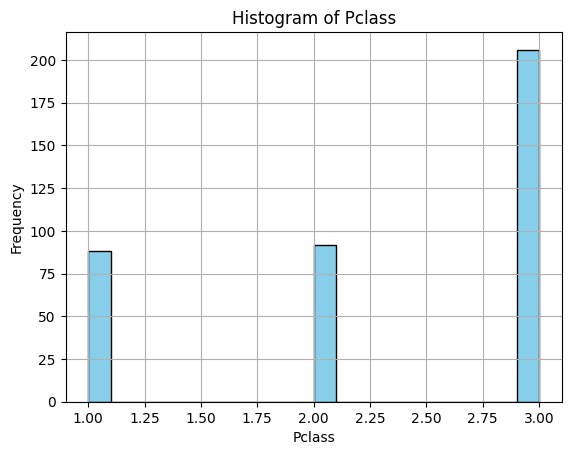

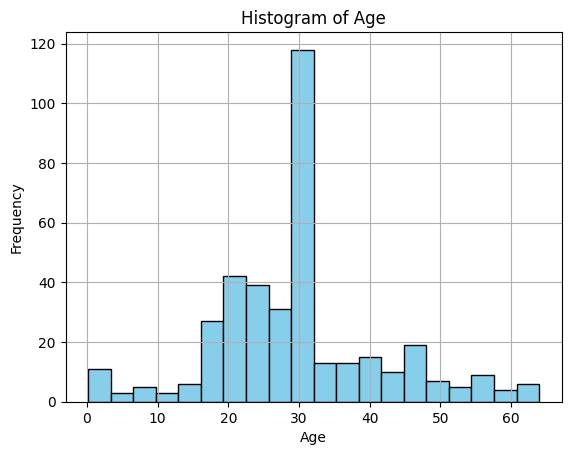

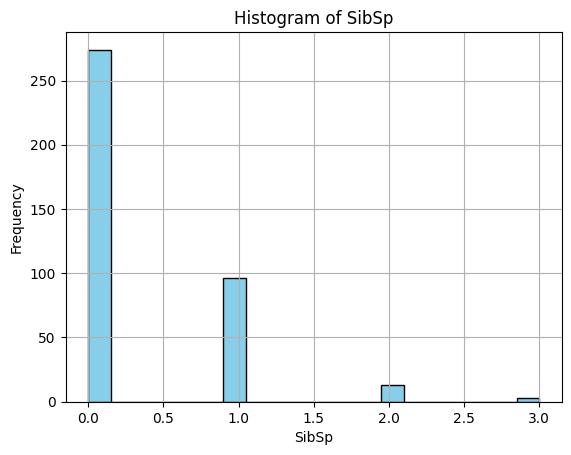

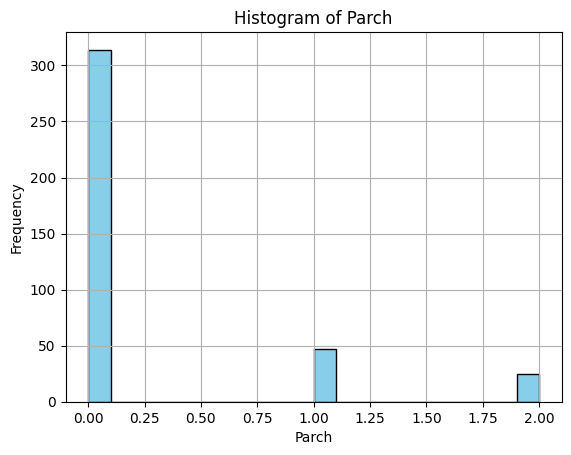

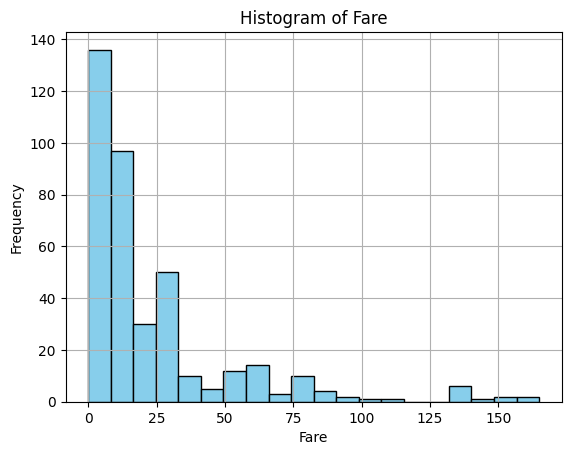

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned datasets
train_cleaned = pd.read_csv("/kaggle/working/train_cleaned.csv")
test_cleaned = pd.read_csv("/kaggle/working/test_cleaned.csv")

# Function to plot histograms
def plot_histogram(data, column):
    plt.hist(data[column], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plot histograms for numeric columns in train_cleaned dataset
numeric_columns = train_cleaned.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plot_histogram(train_cleaned, column)

# Plot histograms for numeric columns in test_cleaned dataset
numeric_columns_test = test_cleaned.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns_test:
    plot_histogram(test_cleaned, column)
